In [14]:
%matplotlib inline

In [15]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.WARN)

In [16]:
import json
import pickle
import os
import gensim
import gc
import gensim.downloader as api

In [17]:
import umap
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
def getTextVector(description):
    result=[]
    try:
        descriptionClean=description.lower().strip()
        tokens = gensim.utils.simple_preprocess(descriptionClean)
        vector = model.infer_vector(tokens)        
        result= vector.tolist()
    except Exception as ex:
        print(ex)        
    return result
    print(result[:10])

In [ ]:
# file = open("SpaceNASA-Sol#.model", encoding="utf8")

In [21]:
model=gensim.models.doc2vec.Doc2Vec.load("SpaceNASA-Sol#_UMP-1.model")

In [22]:
model.init_sims()

C:\Users\SWANNT\AppData\Local\Temp\ipykernel_24088\3100270657.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims()


In [23]:
sourceFiles=["20230711-bigdata-Current.csv"]

In [ ]:
# file = open("SpaceNASA-Sol#.model", encoding="utf8")

In [24]:
header=[]
allItems=[]
allVectors=[]
sols=[]
# depts = []
for sourceFile in sourceFiles:
    lineCount=0
    with open(sourceFile) as fIn:
        lineStr=fIn.readline()
        while(lineStr):
            lineBits = lineStr.strip().split("\t")
            if(lineCount==0):
                header=lineBits
                #print(header)
            else:
                desc = lineBits[0]
                sol=lineBits[4]
                #desc=lineBits[48]
                #rnk=lineBits[49]
                dept= lineBits[5]
                isJacobs=lineBits[26]
                descVector = getTextVector(desc)
                deptVector = getTextVector(dept)
                #lineBits.extend([descVector])
                allVectors.extend([descVector])
                allVectors.extend([deptVector])
                sols.extend([sol])
#                 print(dept)
#                 break
#                 depts.extend([dept])
                #allItems.extend([lineBits])
            lineCount=lineCount+1
            lineStr=fIn.readline()
#             print(lineCount, sol)
            if(lineCount % 10000==0):
                print(lineCount)
#                 print(sol)
#             if(lineCount>20000):
#                 break

10000
20000
30000


In [25]:
trans = umap.UMAP(n_neighbors=20, random_state=42).fit(allVectors)

In [26]:
xY=trans.embedding_
print(xY)

[[12.852401   -2.8863704 ]
 [ 1.3518765  12.113496  ]
 [13.552896   -2.8486936 ]
 ...
 [ 0.41493383 11.791533  ]
 [20.336912    4.6493673 ]
 [-2.4027052   6.41457   ]]


In [ ]:
destFile="bigData-202x-SpaceTemp99.csv"

with open(destFile, "w") as fout:
    for i in range(0, 15):
        outlineBits = [sols[i], str(xY[i][0]), str(xY[i][1])]
        fout.write("\t".join(outlineBits))
        fout.write("\n")

C:\Users\SWANNT\AppData\Local\Temp\ipykernel_24088\4040194364.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans.embedding_[:, 0], trans.embedding_[:,1], s= .5,cmap='viridis')


Text(0.5, 1.0, 'Space Contracts')

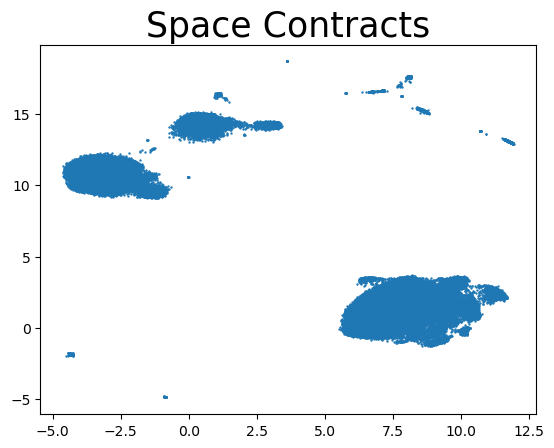

In [13]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:,1], s= .5,cmap='viridis')
plt.title('Space Contracts', fontsize=25)

C:\Users\SWANNT\AppData\Local\Temp\ipykernel_24088\4040194364.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans.embedding_[:, 0], trans.embedding_[:,1], s= .5,cmap='viridis')


Text(0.5, 1.0, 'Space Contracts')

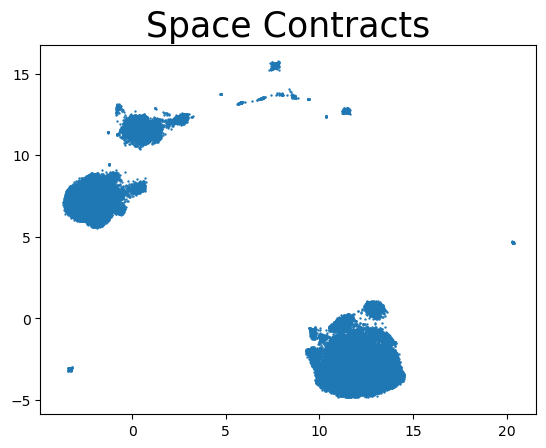

In [27]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:,1], s= .5,cmap='viridis')
plt.title('Space Contracts', fontsize=25)